
image 1/1 h:\Work Space\gp\interface\hajj_anomaly_detector_interface\app\static\models\test_images\TR_2_mp4-48_jpg.rf.9f61ff010001511f503ad5145ac36ab2.jpg: 640x640 1 Opp_Direction, 7 Runnings, 2 Sittings, 10 Standings, 514.8ms
Speed: 7.2ms preprocess, 514.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


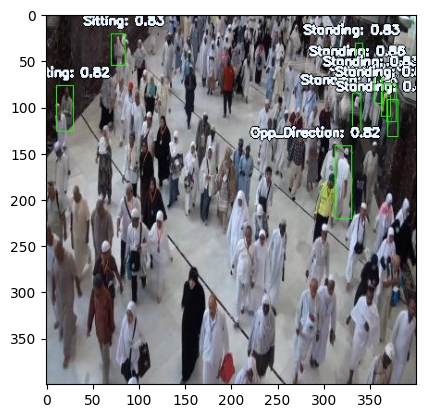

In [71]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model_path = 'app/static/models/best.pt'
image_path = 'app/static/models/test_images/TR_2_mp4-48_jpg.rf.9f61ff010001511f503ad5145ac36ab2.jpg'
yolo_model = YOLO(model=model_path)
labels = ['Diff_Direction', 'Non_Pedestrain', 'Opp_Direction', 'Running', 'Sitting', 'Sleeping', 'Standing']

results = yolo_model(image_path)

boxes = results[0].boxes

image = cv2.imread(image_path)
image_height, image_width = image.shape[:2] # new

for box in boxes:
    confidence = box.conf[0].item() 

    if confidence >= 0.80:
        x1, y1, x2, y2 = box.xyxy[0].numpy().astype(int)
        label = labels[int(box.cls[0].item())]  

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 22), 1)  

        if x2 > image_width - 100:
            # Adjust the text position
            text_position = (x1 - (len(label)*7), y1 - 10)
        elif x1 < 10:
            # Adjust the text position
            text_position = (x1, y1 - 10)
        else:
            # Default text position
            text_position = (x1 - 30, y1 - 10)

        text = f'{label}: {confidence:.2f}'
        cv2.putText(image, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 0), 3) # border
        cv2.putText(image, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 246, 233), 2)

output_path = 'app/static/models/test_images/69boxes.jpg'
cv2.imwrite(output_path, image)

image = cv2.imread(output_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


# (255, 211, 113)